In [1]:
import integrand_builder
import plot_util

In [2]:
compiled = integrand_builder.CompiledIntegrand()
compiled.compile()


Compiling evaluator: "integrand"
Done!
Compiling evaluator: "counter_term"
Done!
Compiling evaluator: "subtracted"
Done!
Compiling evaluator: "integrated_counter_term"
Done!


In [3]:
compiled.p1 = [4, 1, 1, 1]
compiled.p1 = [4, -1, -2, -1]
compiled.m = 1
compiled.thresh = 5

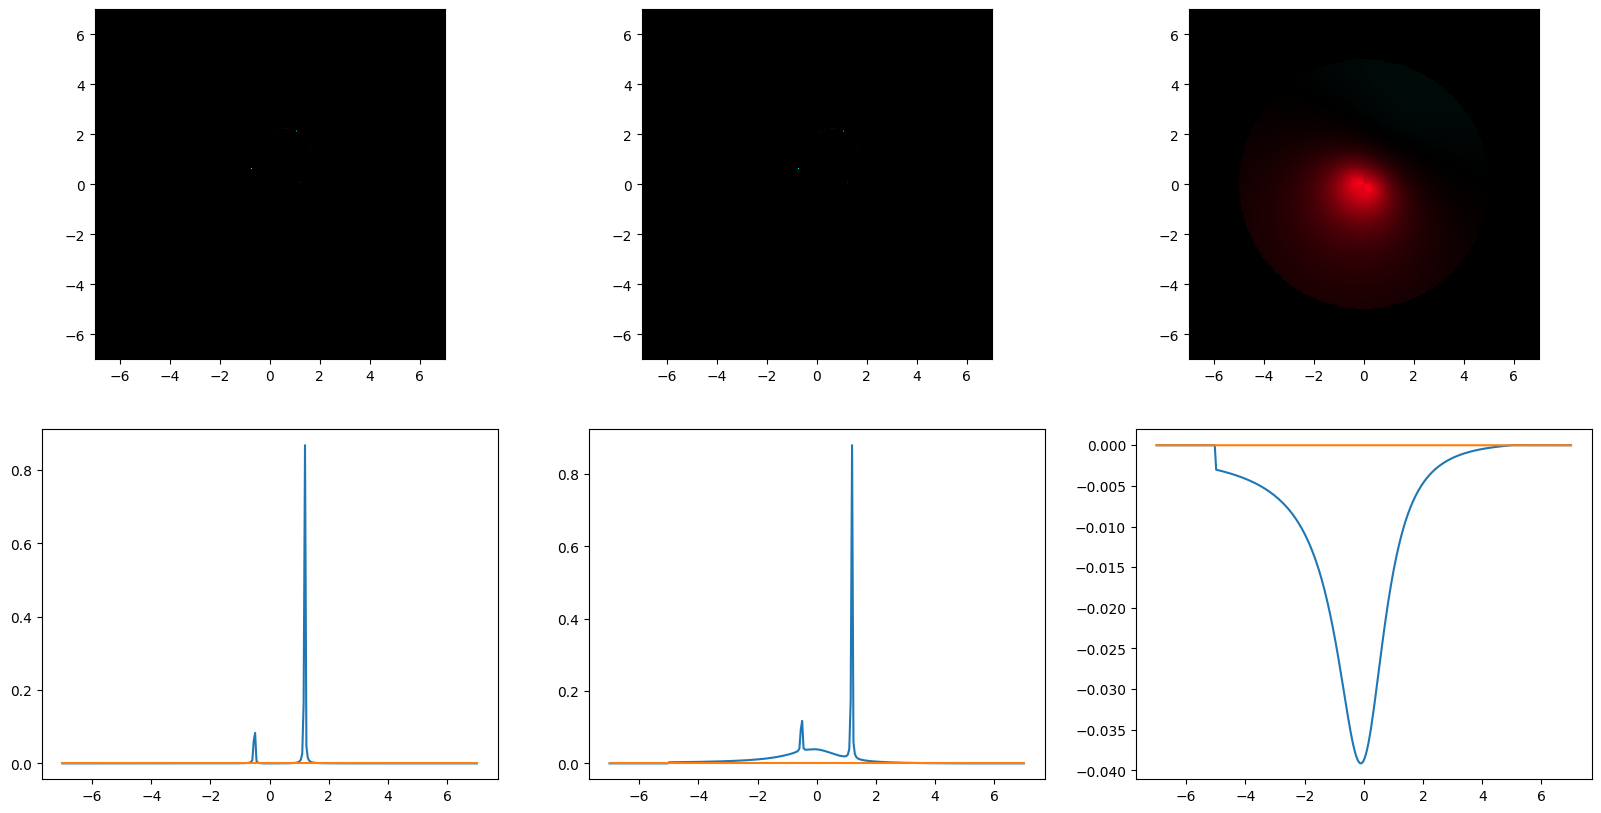

In [4]:
plot_util.plot_threshold_subtraction(compiled, (-7,7), (-7,7))

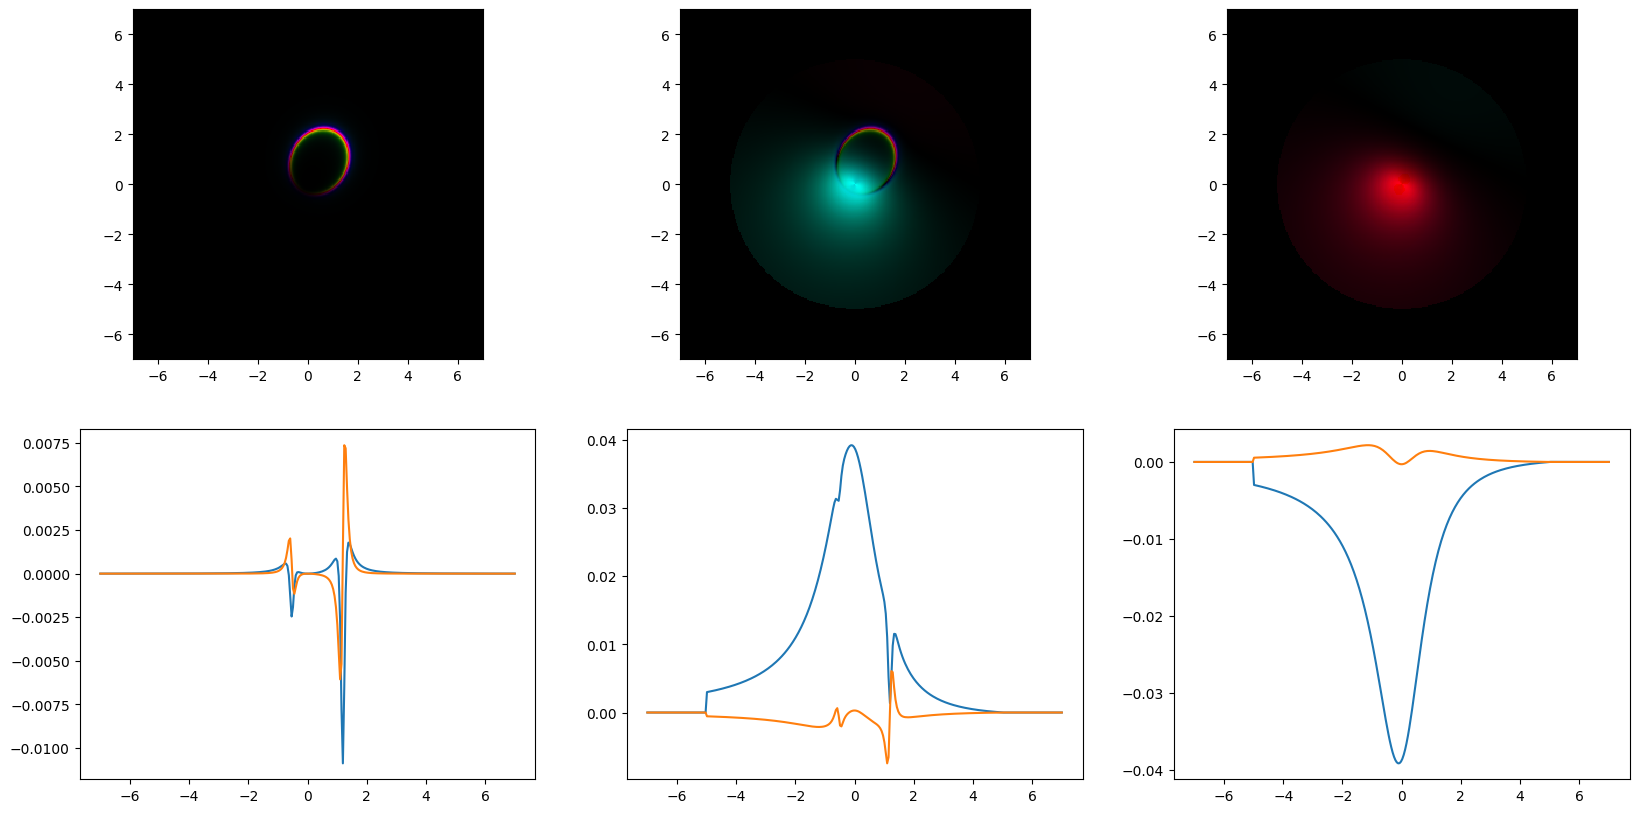

In [5]:
compiled.m = 1-0.1j
plot_util.plot_threshold_subtraction(compiled, (-7,7), (-7,7))

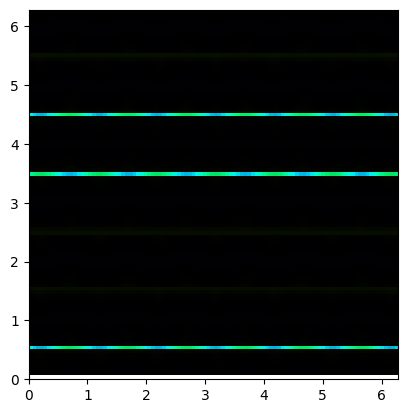

In [21]:
import numpy as np
x = np.linspace(0, 2*np.pi, 100)
y = np.linspace(0, 2*np.pi, 100)
X, Y = np.meshgrid(x, y)

xs = np.array([X.ravel(), Y.ravel()]).T
ks, _ = compiled.spherical_2d(xs)
res = compiled.eval_integrated_counterterm(ks)
xs = (X + Y*1j).reshape(100,100)
res = res.reshape(100,100)

plot_util.plot_complex_plane(xs, res)

In [6]:
print(compiled.integrate_naive(epochs=50, samples_per_epoch=50_000))
print(compiled.get_reference())

100%|██████████| 50/50 [00:12<00:00,  4.02it/s]

ComplexIntegratorResult:
value = (-0.000726±0.000035) + i(0.002508±0.000035)
relative absolute error = 1.9% , convergence=29.934, iters=2500000
(-0.0015964175321883983+0.002506599666629056j)


########################################################################
#                                                                      #
#                        You are using OneLOop                         #
#                                                                      #
# for the evaluation of 1-loop scalar 1-, 2-, 3- and 4-point functions #
#                                                                      #
# author: Andreas van Hameren <hamerenREMOVETHIS@ifj.edu.pl>           #
#   date: 2024-11-23                                                   #
#                                                                      #
# Please cite                                                          #
#    A. van Hameren,                                                   #
#      Comput.Phys.Commun. 182 (2011) 2427-2438, arXiv:1007.4716       #
#    A. van Hameren, C.G. Papadopoulos and R. Pittau,                  #
#      JHEP 0909:106,2009, arXiv:0903.4665         

In [7]:
print(compiled.integrate_subtracted(epochs = 50, samples_per_epoch=20_000))

100%|██████████| 50/50 [00:09<00:00,  5.33it/s]

ComplexIntegratorResult:
value = (-0.019101±0.000023) + i(0.007957±0.000033)
relative absolute error = 0.19% , convergence=1.943, iters=1000000


In [8]:
print(compiled.integrate_counterterm(epochs=50, samples_per_epoch=20_000))

100%|██████████| 50/50 [00:20<00:00,  2.48it/s]

ComplexIntegratorResult:
value = (0.035388±0.000031) + i(-0.010767±0.000022)
relative absolute error = 0.1% , convergence=1.027, iters=1000000
